# Laplace Solver in 2D

The Laplace equation is given as,

<center>$ \nabla^2 \phi = 0 $ </center>   

where $\phi$ is the potential. Here's the same equation in 2D (using Cartesian coordinates), 


<center>$\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0 $</center>  
 
In order to solve for the potential numerically, we have to express the above equation in a *discretized* form. There are different ways of going about this, but for our purposes we'll stick with the central differening method [Source].  

<center>$ \frac{\phi^n_{i+1,j}-2\phi^n_{i,j}+\phi^n_{i-1,j}}{\Delta x^2} + \frac{\phi^n_{j+1}-2\phi^n_{j}+\phi^n_{i,j-1}}{\Delta y^2} = 0 $</center>

Solving for $ \phi^n_{i,j} $ we get an equation whose form we can use in our code, 

<center>$ \phi^n_{i,j} = \frac{\Delta y^2 (\phi^n_{i+1,j} + \phi^n_{i-1,j}) + \Delta x^2 (\phi^n_{j+1} + \phi^n_{j-1})}{2(\Delta x^2 + \Delta y^2)} $</center>

### The scenario: Parallel Plate Capacitor  

In this scenario, we have a pair of electrodes, held at different potentials, with a length $L$ and separation distance $d$. We will assume that the potential is initially zero everywhere. The boundary conditions are outlined below (we'll input numbers once we get to the code): 

<center>1. $V = V_{max}$ at $y = y_{max}$ <br>
2. $V = V_{min}$ at $y = y_{min}$ <br>
3. $V = V_{min}$ at $x = x_{max}$ <br>
4. $V = V_{min}$ at $x = x_{min}$</center>

We begin by importing the appropriate Python libraries. 

In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Let's now use our descritized equation to build a function that we'll use to iteratively solve for the potential.

<center>$ \phi^n_{i,j} = \frac{\Delta y^2 (\phi^n_{i+1,j} + \phi^n_{i-1,j}) + \Delta x^2 (\phi^n_{j+1} + \phi^n_{j-1})}{2(\Delta x^2 + \Delta y^2)} $</center>

Python functions are a generalized set of instructions that we later feed information to. 

In [2]:
#From Barba, L. (2015)

def laplace2d(p, y, dx, dy, l1norm_target): #replace norm with tolerance 
    """ What you do?"""

    l1norm = 1
    pn = numpy.empty_like(p)

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                        (2 * (dx**2 + dy**2)))
            
        p[:, 0] = 0  # p = 0 @ x = 0
        p[:, -1] = y  # p = y @ x = 2
        p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
        p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1
        l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])) /
                np.sum(np.abs(pn[:])))
     
    return p

Main code: 

In [3]:

##variable declarations
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)


##initial conditions
p = np.zeros((ny, nx))  # create a XxY vector of 0's


##plotting aids
x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)

##boundary conditions
p[:, 0] = 0  # p = 0 @ x = 0
p[:, -1] = y  # p = y @ x = 2
p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1



Lets plot it! 

In [4]:
def plot2D(x, y, p):
    """Was dis?"""
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

#### Testing, testing...

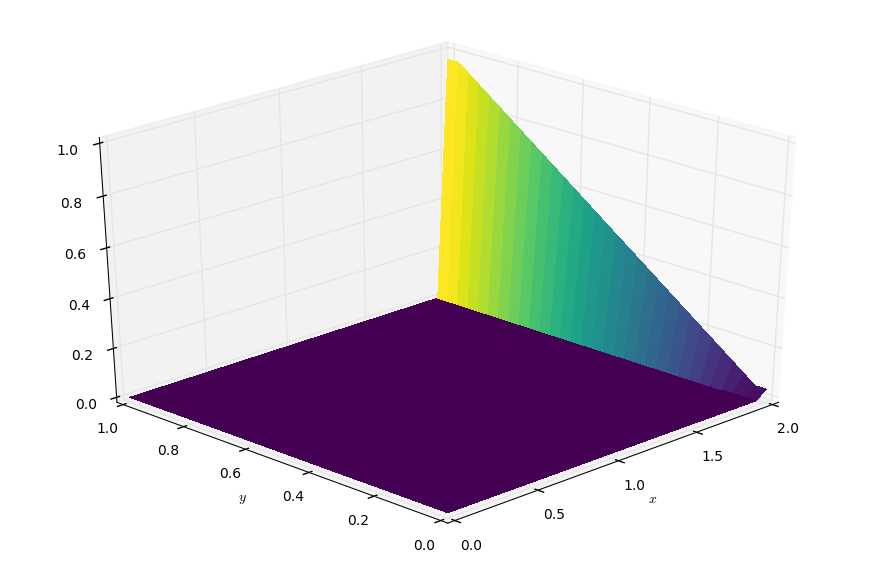

In [5]:
plot2D(x, y, p)

#print(p)

In [6]:
#from IPython.core.display import HTML
#def css_styling():
#    styles = open("../styles/custom.css", "r").read()
#    return HTML(styles)
#css_styling()